In [2]:
#librerias para el desarrollo del proyecto
import matplotlib.pyplot as plt #libreria para graficas
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
from matplotlib.ticker import StrMethodFormatter
import seaborn as sb

#librerias pandas para el manejo de los datos
import pandas as pd
import pandas as pq
import pandas as pf
import pandas as filtro_filas

#enlazando los datos en el archivo excel
data = pd.read_csv(r"C:/Users/MADDOX/datasetCKD/kidney_disease.csv", sep=';')
import numpy as np
#invocando a la libreria de clasificacion
from sklearn.svm import SVC

In [3]:
data

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,1.0,0.0,0.0,...,44,7800,5.2,1.0,1.0,0.0,1.0,0.0,0.0,1
1,1,7.0,50.0,1.020,4.0,0.0,NaN,1.0,0.0,0.0,...,38,6000,NaN,0.0,0.0,0.0,1.0,0.0,0.0,1
2,2,62.0,80.0,1.010,2.0,3.0,1.0,1.0,0.0,0.0,...,31,7500,NaN,0.0,1.0,0.0,0.0,0.0,1.0,1
3,3,48.0,70.0,1.005,4.0,0.0,1.0,0.0,1.0,0.0,...,32,6700,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1
4,4,51.0,80.0,1.010,2.0,0.0,1.0,1.0,0.0,0.0,...,35,7300,4.6,0.0,0.0,0.0,1.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,...,47,6700,4.9,0.0,0.0,0.0,1.0,0.0,0.0,0
396,396,42.0,70.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,...,54,7800,6.2,0.0,0.0,0.0,1.0,0.0,0.0,0
397,397,12.0,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,...,49,6600,5.4,0.0,0.0,0.0,1.0,0.0,0.0,0
398,398,17.0,60.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,...,51,7200,5.9,0.0,0.0,0.0,1.0,0.0,0.0,0


In [4]:
# Ver las últimas columnas y filas reales del archivo
print(data.iloc[:, -5:].head(15))



    cad  appet   pe  ane  classification
0   0.0    1.0  0.0  0.0               1
1   0.0    1.0  0.0  0.0               1
2   0.0    0.0  0.0  1.0               1
3   0.0    0.0  1.0  1.0               1
4   0.0    1.0  0.0  0.0               1
5   0.0    1.0  1.0  0.0               1
6   0.0    1.0  0.0  0.0               1
7   0.0    1.0  1.0  0.0               1
8   0.0    1.0  0.0  1.0               1
9   0.0    0.0  0.0  1.0               1
10  0.0    1.0  0.0  1.0               1
11  0.0    0.0  1.0  0.0               1
12  1.0    0.0  1.0  0.0               1
13  1.0    0.0  1.0  0.0               1
14  1.0    0.0  1.0  0.0               1


In [5]:
data.shape

(400, 26)

In [6]:
data.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [7]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    float64
 7   pc              335 non-null    float64
 8   pcc             396 non-null    float64
 9   ba              396 non-null    float64
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [8]:
#Columnas con missing
null_columns=data.columns[data.isnull().any()]

print(null_columns)

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane'],
      dtype='object')


<Axes: >

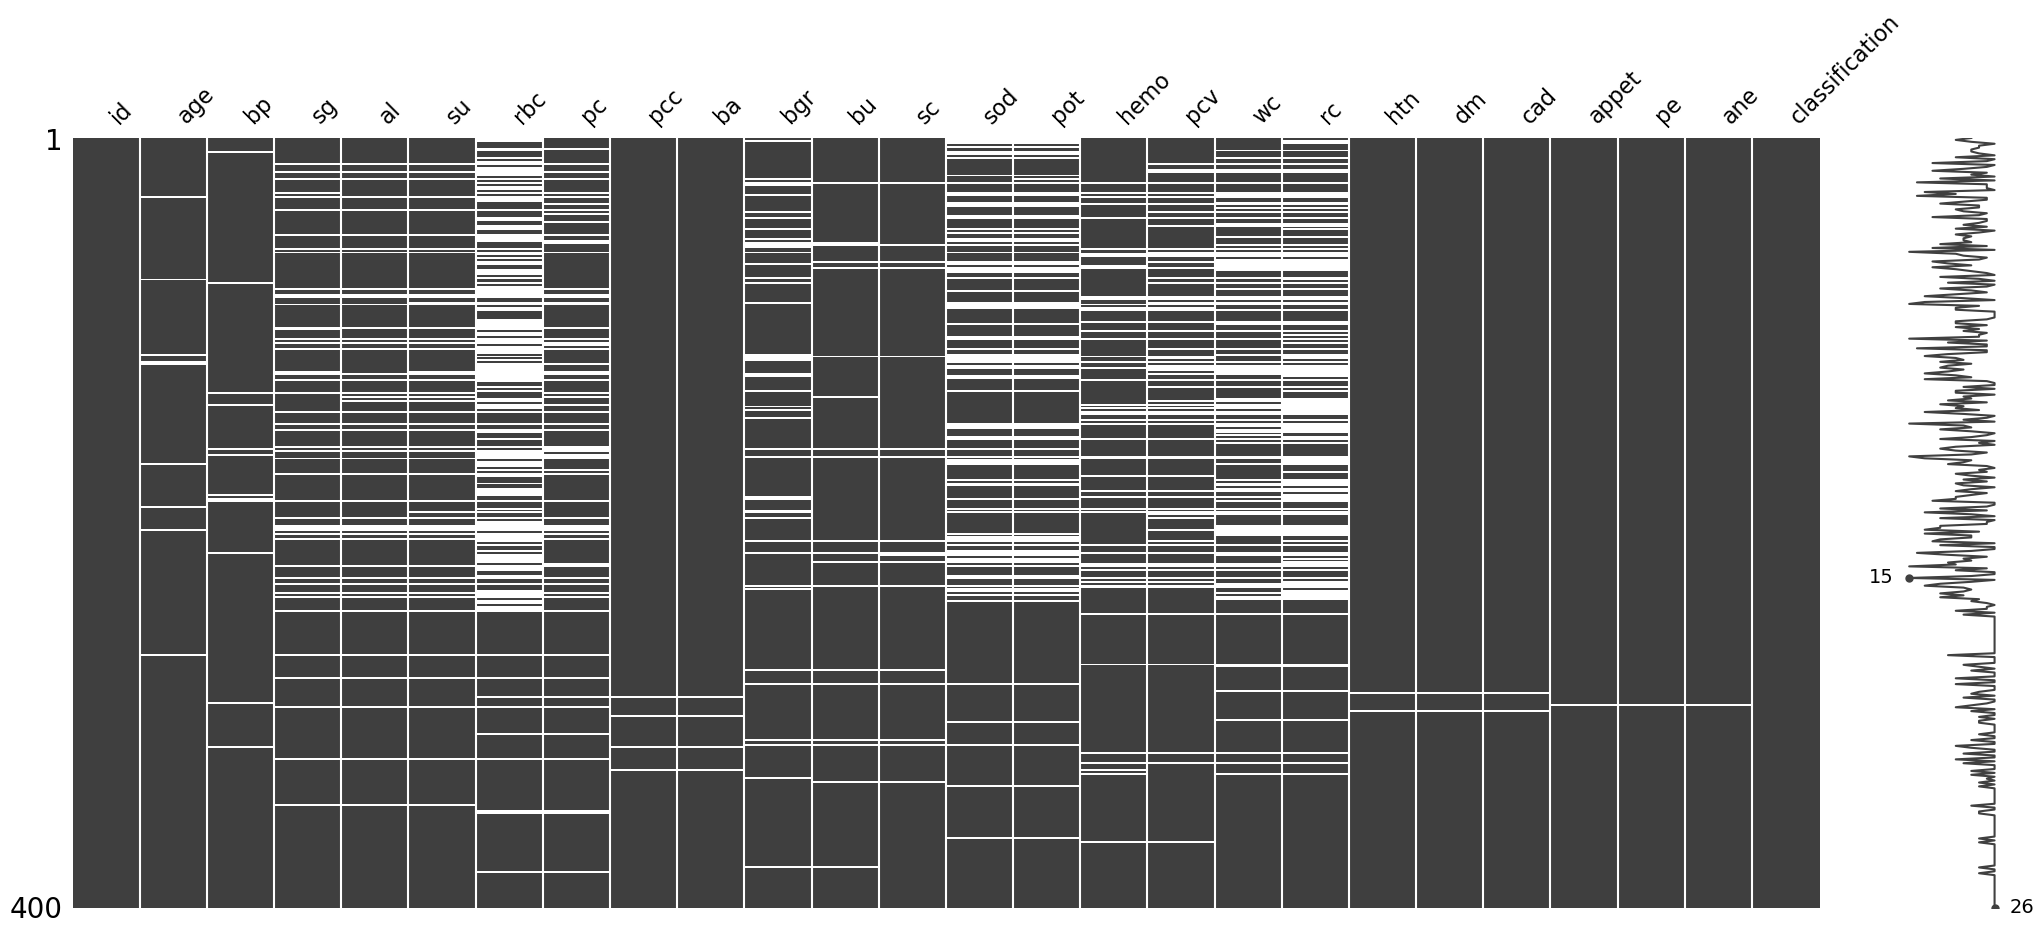

In [9]:
import missingno as msno
msno.matrix(data) 

In [10]:
# captura el numero de filas y columnas
rows = len(data.axes[0])
cols = len(data.axes[1])

# Imprimir el numero de filas y columnas
print("Numero de filas: " + str(rows))
print("Numero de columnas: " + str(cols))

Numero de filas: 400
Numero de columnas: 26


In [11]:
data.isnull().any()

id                False
age                True
bp                 True
sg                 True
al                 True
su                 True
rbc                True
pc                 True
pcc                True
ba                 True
bgr                True
bu                 True
sc                 True
sod                True
pot                True
hemo               True
pcv                True
wc                 True
rc                 True
htn                True
dm                 True
cad                True
appet              True
pe                 True
ane                True
classification    False
dtype: bool

In [12]:
#verificamos la edad de las personas para ver si estan dentro del rango
print(data.groupby('age').size())

age
2.0     1
3.0     1
4.0     1
5.0     2
6.0     1
       ..
80.0    4
81.0    1
82.0    1
83.0    1
90.0    1
Length: 76, dtype: int64


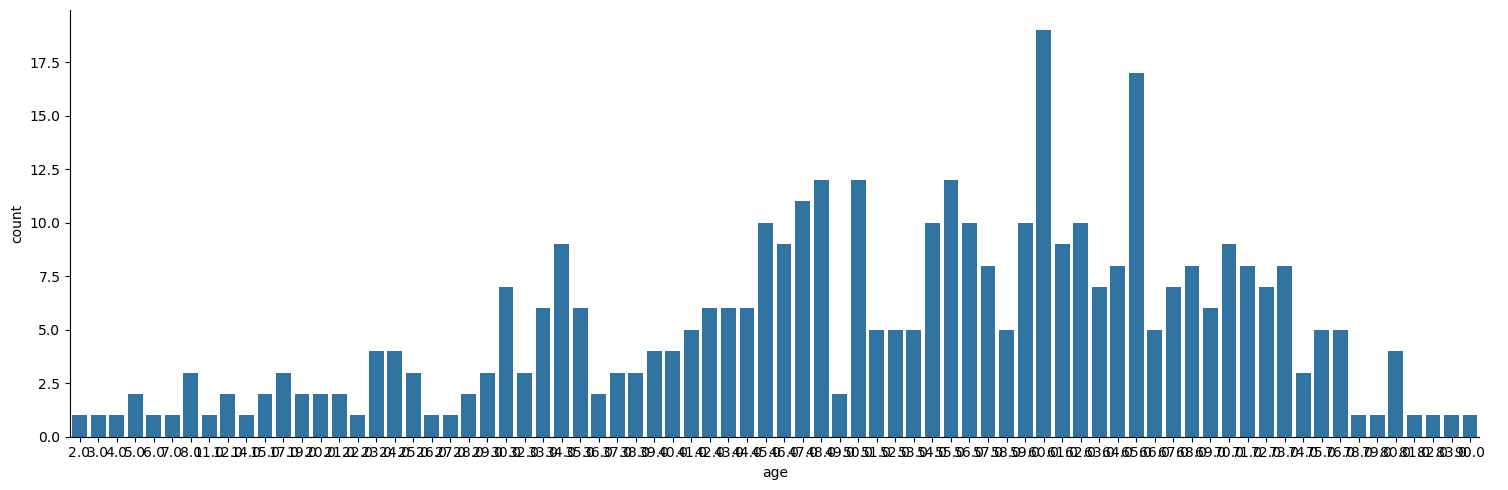

In [13]:
import seaborn as sb

sb.catplot(x='age', data=data, kind="count", aspect=3)


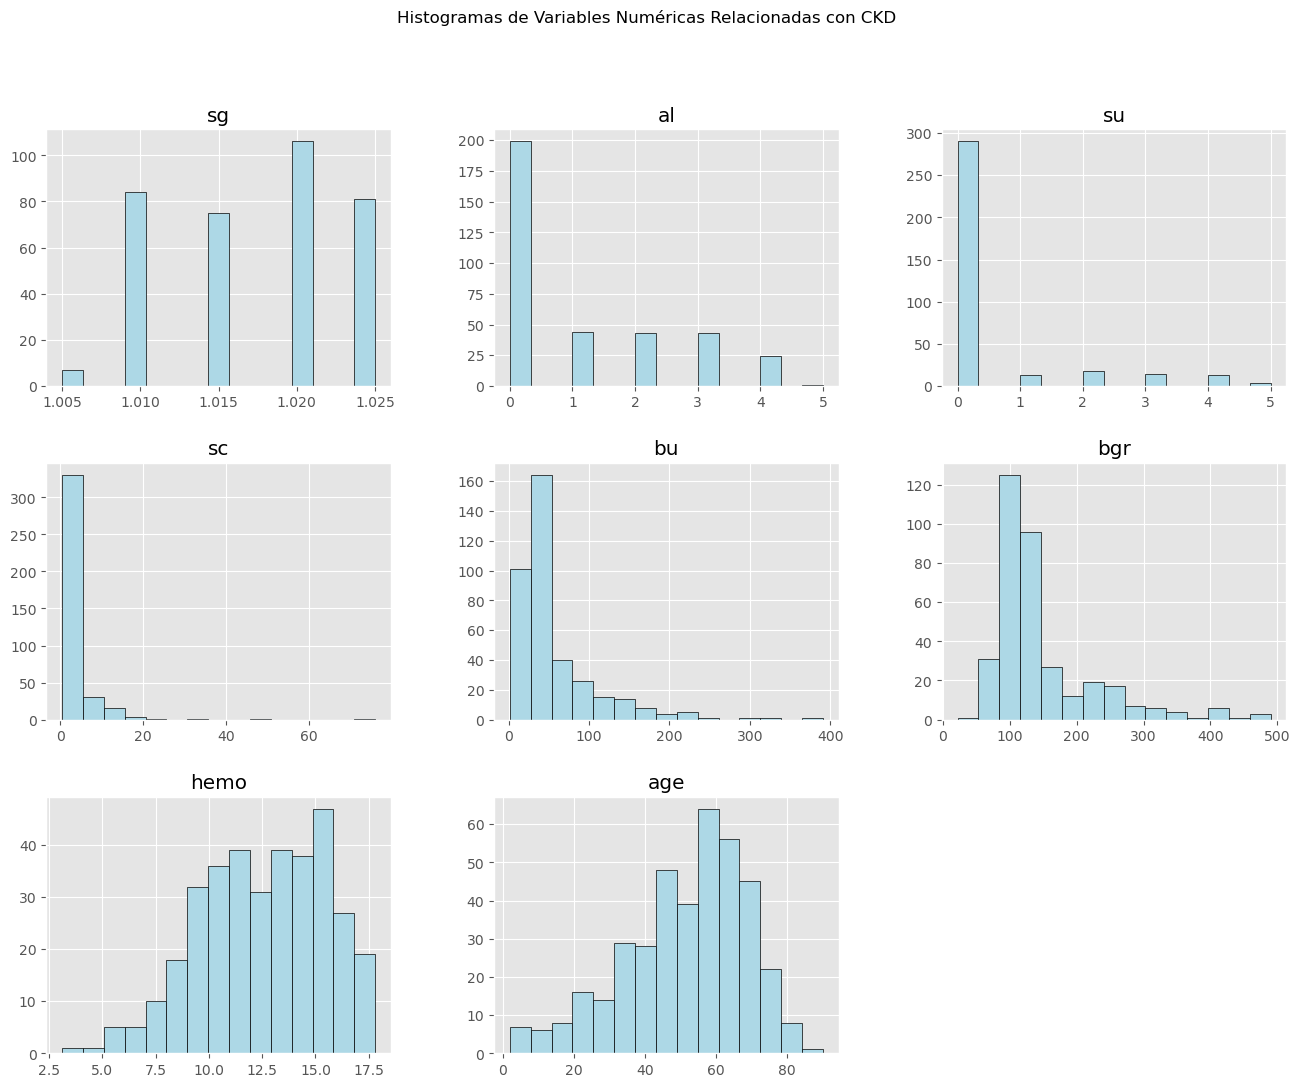

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

# Configuración del tamaño y estilo de la gráfica
plt.rcParams['figure.figsize'] = (16, 12)
plt.style.use('ggplot')

# Lista de columnas numéricas a graficar
columns_to_plot = ['sg', 'al', 'su', 'sc', 'bu', 'bgr', 'hemo', 'pcv', 'rc', 'wc', 'age']

# Filtrar el DataFrame solo con las columnas numéricas
data_to_plot = data[columns_to_plot]

# Crear histogramas para las columnas especificadas
ax = data_to_plot.hist(bins=15, edgecolor='black', color='lightblue')

# Mostrar la gráfica
plt.suptitle('Histogramas de Variables Numéricas Relacionadas con CKD')
plt.show()


In [15]:
X = data[['sg', 'al', 'su', 'sc', 'bu', 'bgr', 'hemo', 'pcv', 'rc', 'wc',
          'dm', 'htn', 'ane', 'appet', 'rbc', 'pc', 'age']].values

In [30]:
X.shape

(400, 17)

In [32]:
Y = data['classification']  # Variable objetivo: Diagnóstico CKD o Not CKD

In [34]:
Y.shape

(400,)

In [36]:
from sklearn.metrics import roc_curve, auc
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Particionamiento de la data


In [38]:
#particionando la data en 0.8 para entrenar y 0.2 para validar
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, Y, test_size=0.2, random_state=0)

print(X_trainset.shape, y_trainset.shape)
print (X_testset.shape, y_testset.shape)

(320, 17) (320,)
(80, 17) (80,)


# Correlación de las variables

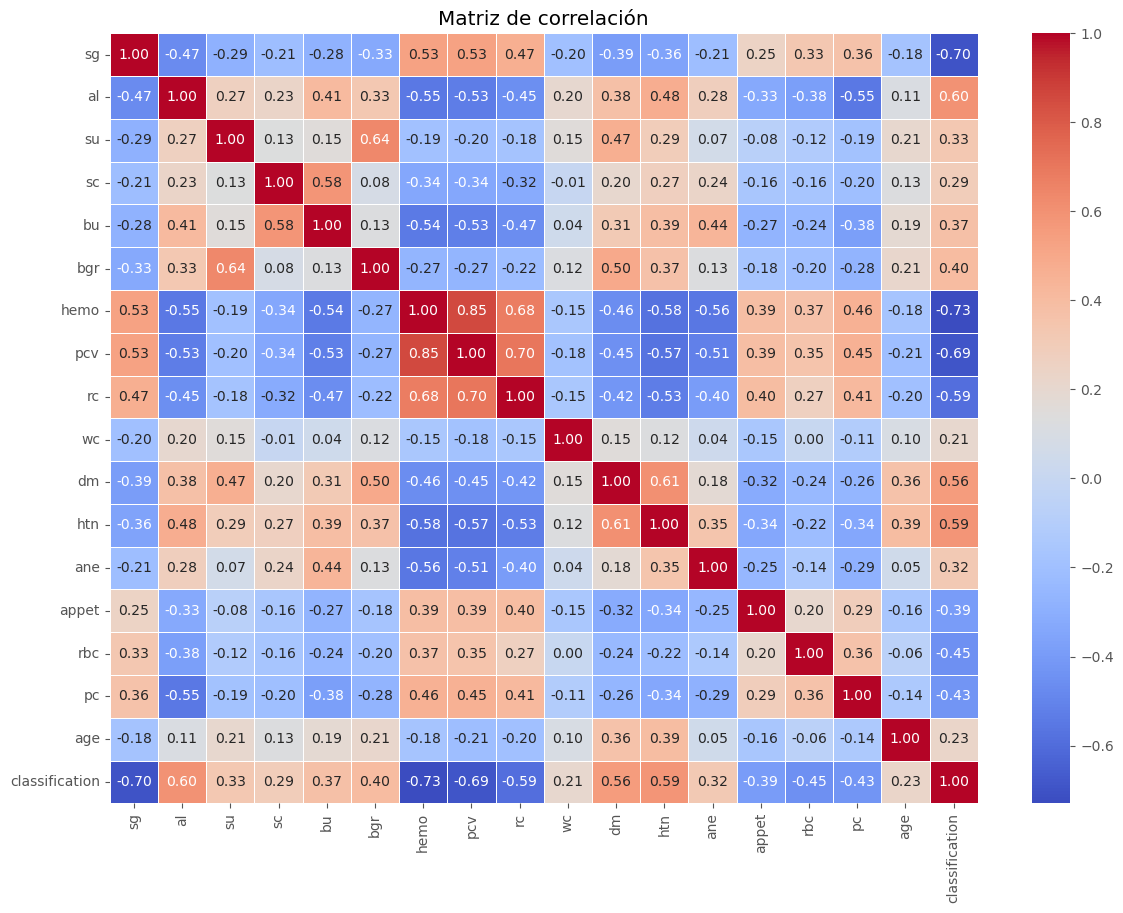

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Selecciona las columnas que quieres usar
cols = ['sg', 'al', 'su', 'sc', 'bu', 'bgr', 'hemo', 'pcv', 'rc', 'wc',
        'dm', 'htn', 'ane', 'appet', 'rbc', 'pc', 'age', 'classification']

data_subset = data[cols]

# Reemplaza valores que son '?' o con espacios en blanco y tabuladores por NaN
data_subset = data_subset.replace(['?', '\t?'], pd.NA)

# Convierte todas las columnas a tipo numérico (donde no se pueda, quedará NaN)
for col in cols:
    data_subset[col] = pd.to_numeric(data_subset[col], errors='coerce')

# Opcional: Imputa valores faltantes, aquí con la media (puedes usar otro método)
data_subset = data_subset.fillna(data_subset.mean())

# Calcula la matriz de correlación
corr_df = data_subset.corr()

# Grafica la matriz de correlación
plt.figure(figsize=(14, 10))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de correlación')
plt.show()



In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Selección de columnas
X = data[['sg', 'al', 'su', 'sc', 'bu', 'bgr', 'hemo', 'pcv', 'rc', 'wc',
          'dm', 'htn', 'ane', 'appet', 'rbc', 'pc', 'age']]
y = data['classification']

# Limpieza de datos
X = X.replace(['?', '\t?'], pd.NA)
y = y.replace(['?', '\t?'], pd.NA)
X = X.apply(pd.to_numeric, errors='coerce')
y = pd.to_numeric(y, errors='coerce')
data_clean = pd.concat([X, y], axis=1).dropna(subset=['classification'])
X = data_clean.drop('classification', axis=1)
y = data_clean['classification']

# División de datos
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.2, random_state=0)

# Imputación de valores
imputer = SimpleImputer(strategy='mean')
X_trainset = imputer.fit_transform(X_trainset)
X_testset = imputer.transform(X_testset)


# Modelo LOGISTIC REGRESION

In [47]:
import numpy as np
print("Distribución de clases:", np.bincount(y))


Distribución de clases: [150 250]


In [49]:
pip install torch scikit-learn pandas numpy

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: pytorch-lightning 1.6.5 has a non-standard dependency specifier torch>=1.8.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pytorch-lightning or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


====== MATRIZ DE CONFUSIÓN - TRAIN ======
PREDICCION    0    1
ACTUAL              
0           120    0
1             0  200

====== MATRIZ DE CONFUSIÓN - TEST ======
PREDICCION   0   1
ACTUAL            
0           30   0
1            1  49


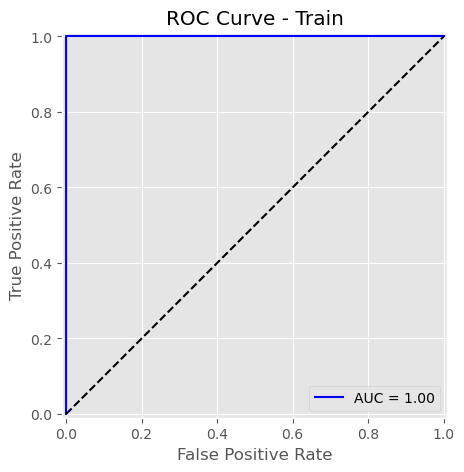

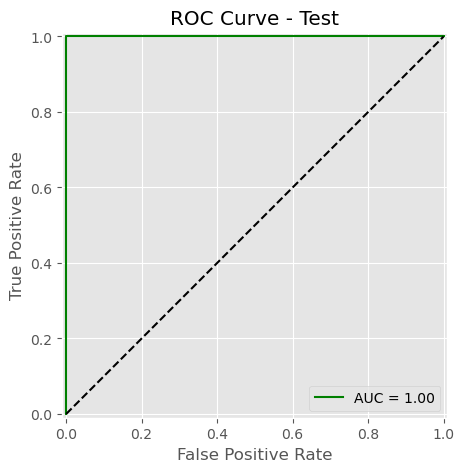

In [71]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_curve, auc, RocCurveDisplay
)
import matplotlib.pyplot as plt

# === CLASES ===
class TabTransformer(nn.Module):
    def __init__(self, input_dim, num_heads=4, hidden_dim=128, num_layers=2):
        super(TabTransformer, self).__init__()
        self.embedding = nn.Linear(input_dim, hidden_dim)
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=hidden_dim, nhead=num_heads,
            dim_feedforward=hidden_dim, dropout=0.1, batch_first=True
        )
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.output_layer = nn.Linear(hidden_dim, 1)
    def forward(self, x):
        x = self.embedding(x)
        x = self.transformer(x)
        return self.output_layer(x.mean(dim=1))

class LSTMClassifier(nn.Module):
    def __init__(self, input_size, hidden_dim=64, num_layers=1):
        super(LSTMClassifier, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_dim, num_layers=num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, 1)
    def forward(self, x):
        out, _ = self.lstm(x)
        return self.fc(out[:, -1, :])

# === FUNCIONES AUXILIARES ===
def safe_tensor(x, dtype=torch.float32):
    if isinstance(x, (pd.DataFrame, pd.Series)):
        x = x.values
    return torch.tensor(x, dtype=dtype)

def train_model(model, X, y, epochs=30, lr=0.001):
    model.train()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    criterion = nn.BCEWithLogitsLoss()
    for _ in range(epochs):
        optimizer.zero_grad()
        loss = criterion(model(X), y)
        loss.backward()
        optimizer.step()

def predict_model(model, X):
    model.eval()
    with torch.no_grad():
        return torch.sigmoid(model(X)).cpu().numpy()

# === CARGA TU DATA AQUÍ ===
# X = tus variables (DataFrame), y = etiquetas (Series)
# ejemplo: X = df.drop("target", axis=1); y = df["target"]

# === SPLIT inicial 80/20 ===
X_trainset, X_testset, y_trainset, y_testset = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# === PREPROCESAMIENTO ===
imputer = SimpleImputer(strategy='mean')
scaler = StandardScaler()

X_train_imputed = imputer.fit_transform(X_trainset)
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)

X_test_imputed = imputer.transform(X_testset)
X_test_scaled = scaler.transform(X_test_imputed)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

# === VALIDACIÓN CRUZADA EN EL TRAINSET ===
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

train_preds_all, train_true_all = [], []
test_preds_all = []
train_proba_all, test_proba_all = [], []

param_grid = {
    'clf__C': [0.1, 1, 10],
    'clf__solver': ['liblinear'],
    'clf__penalty': ['l2']
}

for train_idx, val_idx in skf.split(X_train_scaled_df, y_trainset):
    X_train_cv = X_train_scaled_df.iloc[train_idx]
    y_train_cv = y_trainset.iloc[train_idx]
    X_val_cv = X_train_scaled_df.iloc[val_idx]
    y_val_cv = y_trainset.iloc[val_idx]

    X_train_tensor = safe_tensor(X_train_cv).unsqueeze(1)
    y_train_tensor = safe_tensor(np.array(y_train_cv).reshape(-1, 1))
    X_val_tensor = safe_tensor(X_val_cv).unsqueeze(1)

    # Modelos base
    tmod = TabTransformer(input_dim=X.shape[1])
    lmod = LSTMClassifier(input_size=X.shape[1])
    train_model(tmod, X_train_tensor, y_train_tensor)
    train_model(lmod, X_train_tensor, y_train_tensor)

    # Stacking
    meta_train = np.concatenate([
        predict_model(tmod, X_train_tensor),
        predict_model(lmod, X_train_tensor)
    ], axis=1)
    meta_val = np.concatenate([
        predict_model(tmod, X_val_tensor),
        predict_model(lmod, X_val_tensor)
    ], axis=1)

    # Meta-modelo con GridSearch
    pipe = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler()),
        ('clf', LogisticRegression(class_weight='balanced', max_iter=1000))
    ])
    grid = GridSearchCV(pipe, param_grid, scoring='f1_macro', cv=3, n_jobs=-1)
    grid.fit(meta_train, y_train_cv)
    best = grid.best_estimator_

    train_preds_all.extend(best.predict(meta_train))
    train_true_all.extend(y_train_cv)
    train_proba_all.extend(best.predict_proba(meta_train)[:, 1])

    test_preds_all.extend(best.predict(meta_val))
    test_proba_all.extend(best.predict_proba(meta_val)[:, 1])

# === EVALUACIÓN FINAL EN TESTSET REAL ===
# Entrena modelos base con TODO el conjunto de entrenamiento
X_train_tensor_full = safe_tensor(X_train_scaled_df).unsqueeze(1)
y_train_tensor_full = safe_tensor(np.array(y_trainset).reshape(-1, 1))
X_test_tensor = safe_tensor(X_test_scaled_df).unsqueeze(1)

final_tab = TabTransformer(input_dim=X.shape[1])
final_lstm = LSTMClassifier(input_size=X.shape[1])
train_model(final_tab, X_train_tensor_full, y_train_tensor_full)
train_model(final_lstm, X_train_tensor_full, y_train_tensor_full)

meta_train_final = np.concatenate([
    predict_model(final_tab, X_train_tensor_full),
    predict_model(final_lstm, X_train_tensor_full)
], axis=1)
meta_test_final = np.concatenate([
    predict_model(final_tab, X_test_tensor),
    predict_model(final_lstm, X_test_tensor)
], axis=1)

final_clf = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(class_weight='balanced', max_iter=1000))
])
final_clf.fit(meta_train_final, y_trainset)

# Predicciones finales
final_train_preds = final_clf.predict(meta_train_final)
final_test_preds = final_clf.predict(meta_test_final)
final_train_proba = final_clf.predict_proba(meta_train_final)[:, 1]
final_test_proba = final_clf.predict_proba(meta_test_final)[:, 1]

# === MATRIZ DE CONFUSIÓN ===
print("====== MATRIZ DE CONFUSIÓN - TRAIN ======")
print(pd.crosstab(y_trainset, final_train_preds, rownames=['ACTUAL'], colnames=['PREDICCION']))

print("\n====== MATRIZ DE CONFUSIÓN - TEST ======")
print(pd.crosstab(y_testset, final_test_preds, rownames=['ACTUAL'], colnames=['PREDICCION']))

# === ROC CURVE ===
fpr_train, tpr_train, _ = roc_curve(y_trainset, final_train_proba)
roc_auc_train = auc(fpr_train, tpr_train)

fpr_test, tpr_test, _ = roc_curve(y_testset, final_test_proba)
roc_auc_test = auc(fpr_test, tpr_test)

# Mostrar ROC de entrenamiento
RocCurveDisplay(fpr=fpr_train, tpr=tpr_train, roc_auc=roc_auc_train).plot(color="blue")
plt.plot([0, 1], [0, 1], "k--")
plt.title("ROC Curve - Train")
plt.show()

# Mostrar ROC de prueba
RocCurveDisplay(fpr=fpr_test, tpr=tpr_test, roc_auc=roc_auc_test).plot(color="green")
plt.plot([0, 1], [0, 1], "k--")
plt.title("ROC Curve - Test")
plt.show()




In [53]:
model = grid.best_estimator_
model

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('clf',
                 LogisticRegression(C=0.01, class_weight='balanced',
                                    max_iter=1000, solver='liblinear'))])

In [55]:
print("Tamaño de train_true_all:", len(train_true_all))
print("Tamaño de train_proba_all:", len(train_proba_all))


Tamaño de train_true_all: 1600
Tamaño de train_proba_all: 1600


In [57]:
print(len(final_true), len(final_proba_all))


400 400


## Métricas del Modelo (Train)

<Figure size 600x500 with 0 Axes>

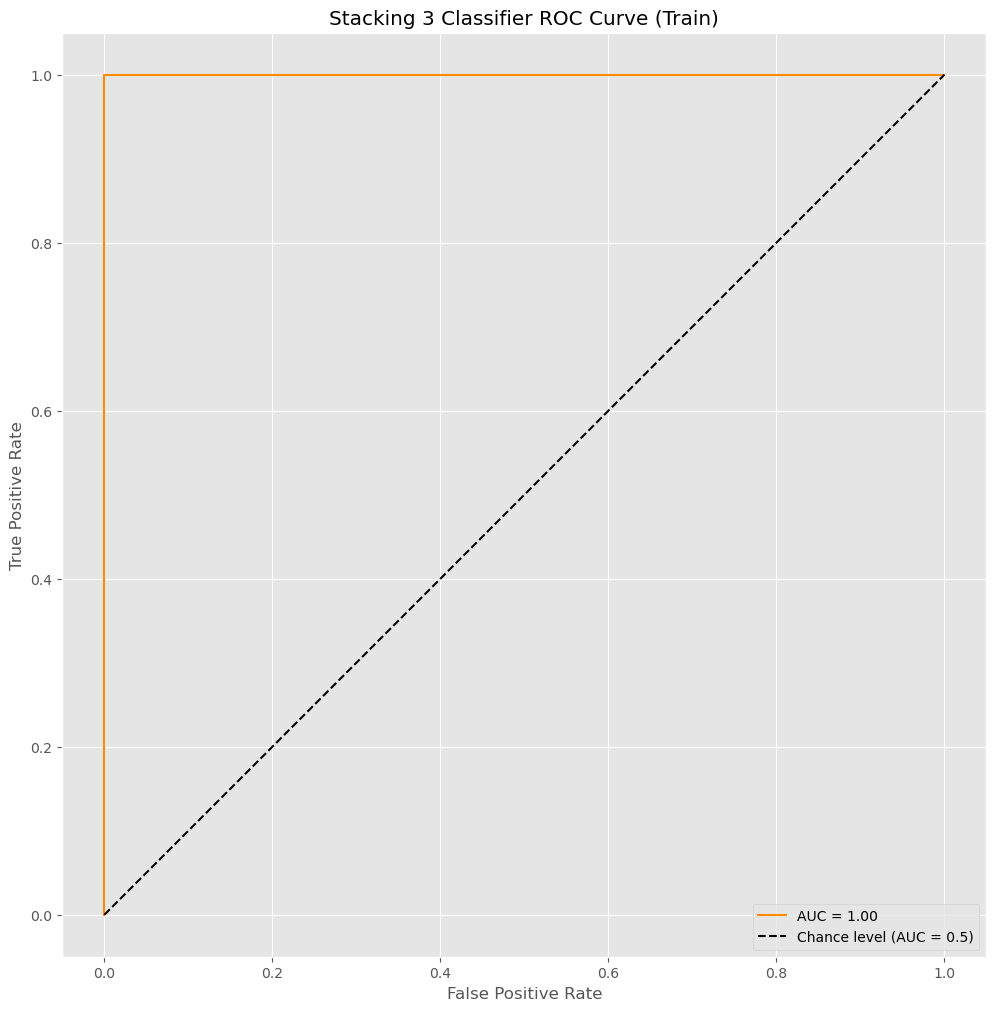

<Figure size 600x500 with 0 Axes>

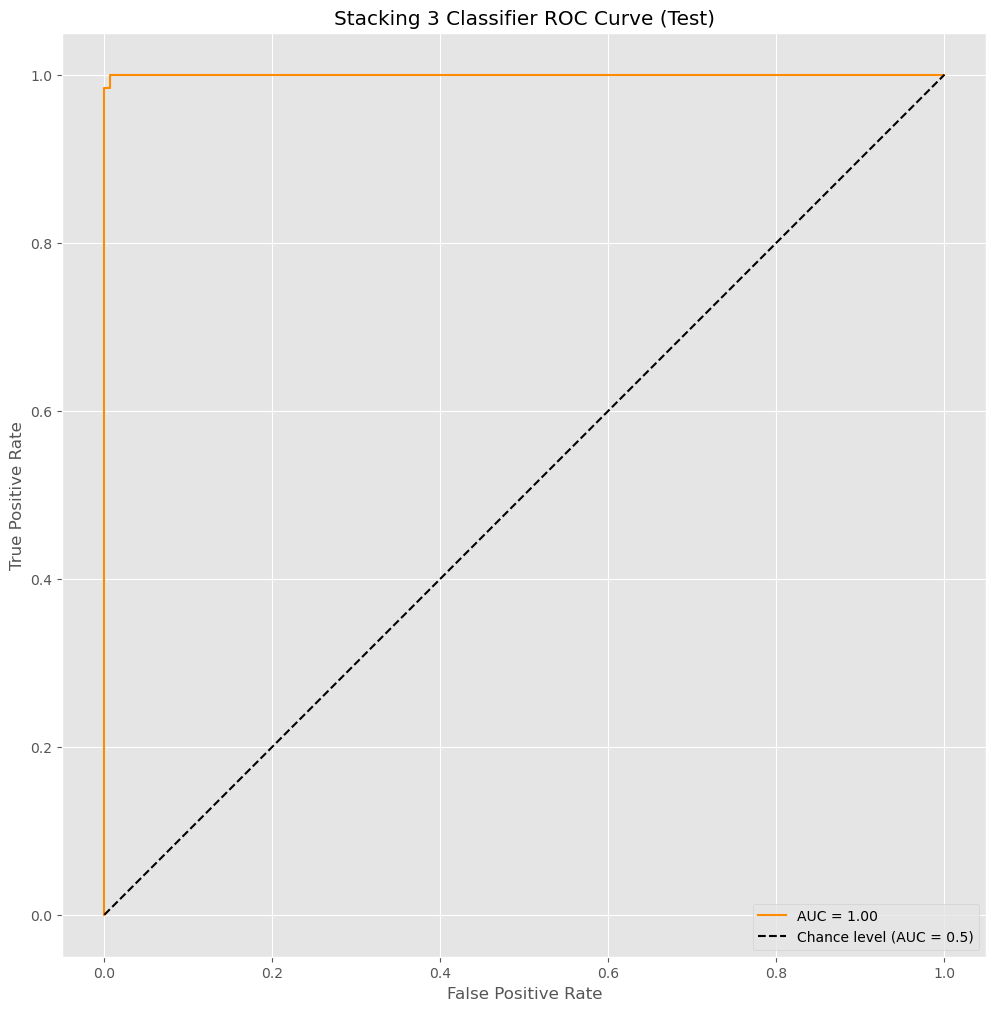

In [60]:

# Mostrar la curva ROC de entrenamiento
plt.figure(figsize=(6, 5))
RocCurveDisplay(fpr=fpr_train, tpr=tpr_train, roc_auc=roc_auc_train).plot(color="darkorange")
plt.plot([0, 1], [0, 1], "k--", label="Chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Stacking 3 Classifier ROC Curve (Train)")
plt.legend()
plt.show()

# === ROC AUC en TEST ===
fpr_test, tpr_test, _ = roc_curve(final_true, final_proba_all)
roc_auc_test = auc(fpr_test, tpr_test)

# Mostrar la curva ROC de prueba
plt.figure(figsize=(6, 5))
RocCurveDisplay(fpr=fpr_test, tpr=tpr_test, roc_auc=roc_auc_test).plot(color="darkorange")
plt.plot([0, 1], [0, 1], "k--", label="Chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Stacking 3 Classifier ROC Curve (Test)")
plt.legend()
plt.show()



In [87]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [94]:
Métricas del Modelo (Train)

SyntaxError: invalid syntax (2111157621.py, line 1)

In [90]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (5, 5)

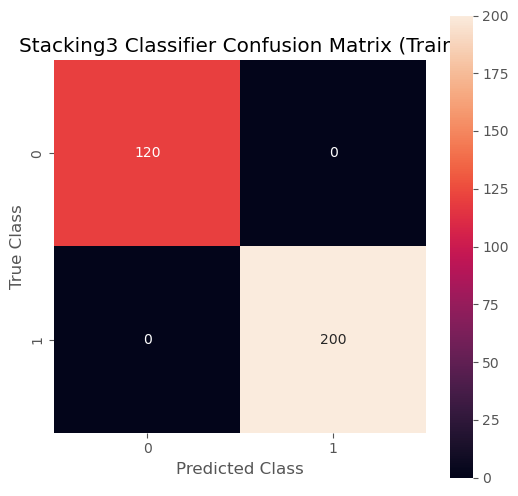

In [98]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

# Crear matriz de confusión como DataFrame (igual que con pd.crosstab)
cnf_matrix_df = pd.crosstab(
    y_trainset, final_train_preds,
    rownames=['ACTUAL'], colnames=['Prediccion']
)

# Ajustar tamaño de la figura
plt.rcParams["figure.figsize"] = (6, 6)

# Heatmap con mismo estilo
sb.heatmap(cnf_matrix_df, square=True, annot=True, fmt='d', cbar=True)

# Etiquetas y título
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Stacking3 Classifier Confusion Matrix (Train)')

plt.show()



## Métricas del Modelo (Test)

In [101]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, classification_report

print("\n====== MÉTRICAS FINALES EN TEST (validación cruzada) ======")
print("Accuracy :", accuracy_score(final_true, final_preds))
print("Recall   :", recall_score(final_true, final_preds, average='macro'))
print("F1 Score :", f1_score(final_true, final_preds, average='macro'))
print("Precision:", precision_score(final_true, final_preds, average='macro'))

print("\n====== Reporte de clasificación ======")
print(classification_report(final_true, final_preds, zero_division=0))



====== MÉTRICAS FINALES EN TEST (validación cruzada) ======
Accuracy : 0.99
Recall   : 0.9906666666666666
F1 Score : 0.9893614191866805
Precision: 0.9881154499151104

====== Reporte de clasificación ======
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       150
           1       1.00      0.99      0.99       250

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400



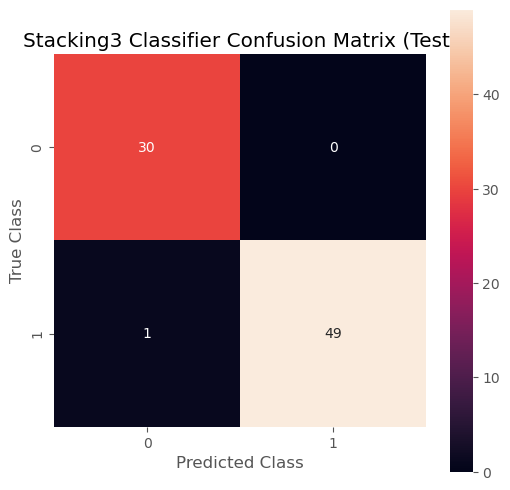

In [103]:
# Matriz de confusión para el conjunto de prueba
cnf_matrix_test_df = pd.crosstab(
    y_testset, final_test_preds,
    rownames=['ACTUAL'], colnames=['Prediccion']
)

plt.rcParams["figure.figsize"] = (6, 6)
sb.heatmap(cnf_matrix_test_df, square=True, annot=True, fmt='d', cbar=True)

plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Stacking3 Classifier Confusion Matrix (Test)')

plt.show()


In [201]:
plt.rcParams["figure.figsize"] = (4, 4)

## ROC Curve (Train)

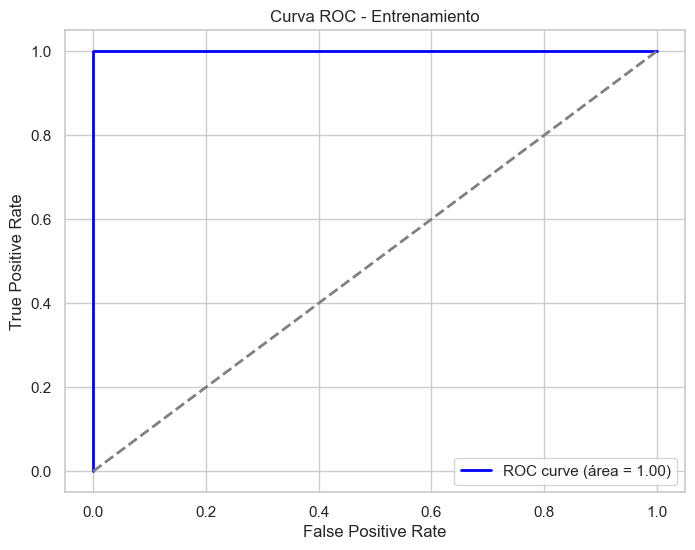

In [79]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

# === ROC para TRAIN ===
fpr_train, tpr_train, _ = roc_curve(train_true_all, train_proba_all)
roc_auc_train = auc(fpr_train, tpr_train)

plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label=f'ROC curve (área = {roc_auc_train:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Entrenamiento')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


## ROC Curve (Test)

In [207]:
# === ROC para TEST ===
fpr_test, tpr_test, _ = roc_curve(final_true, test_proba_all)
roc_auc_test = auc(fpr_test, tpr_test)

plt.figure(figsize=(8, 6))
plt.plot(fpr_test, tpr_test, color='green', lw=2, label=f'ROC curve (área = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Test')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


ValueError: Found input variables with inconsistent numbers of samples: [400, 0]

## Precision Recall Curve (Train)

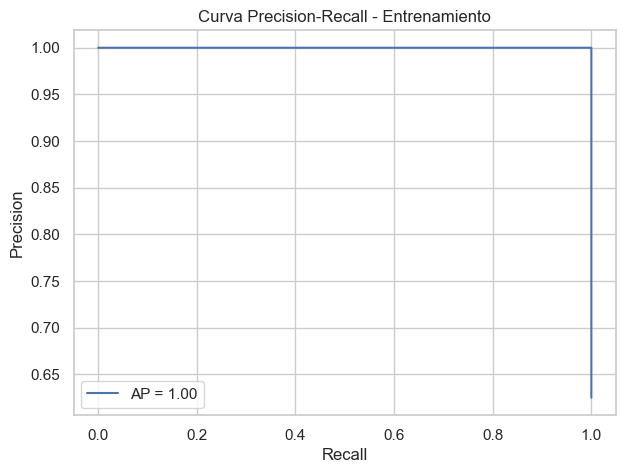

In [210]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# === Curva Precision-Recall - TRAIN ===
precision_train, recall_train, _ = precision_recall_curve(train_true_all, train_proba_all)
avg_precision_train = average_precision_score(train_true_all, train_proba_all)

plt.figure(figsize=(7, 5))
plt.plot(recall_train, precision_train, label=f'AP = {avg_precision_train:.2f}', color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall - Entrenamiento')
plt.grid(True)
plt.legend()
plt.show()


## Precision Recall Curve (Test)

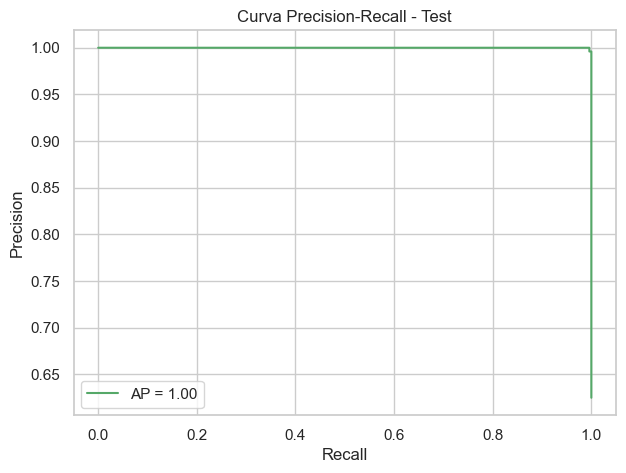

In [213]:
# === Curva Precision-Recall - TEST ===
precision_test, recall_test, _ = precision_recall_curve(final_true, final_proba_all)
avg_precision_test = average_precision_score(final_true, final_proba_all)

plt.figure(figsize=(7, 5))
plt.plot(recall_test, precision_test, label=f'AP = {avg_precision_test:.2f}', color='g')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall - Test')
plt.grid(True)
plt.legend()
plt.show()


In [215]:
import os
import pickle

# Ruta de guardado
directorio = r'C:\Users\Hp\Documents\CICLO III\Investigación Cientifica\algoritmo\a'
ruta_guardado = os.path.join(directorio, 'LR.pkl')

# Crear directorio si no existe
os.makedirs(directorio, exist_ok=True)

# Guardar modelo
pickle.dump(model, open(ruta_guardado, 'wb'))


In [217]:
pickle.dump(grid.best_estimator_, open(ruta_guardado, 'wb'))
